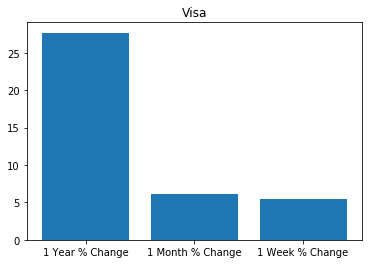

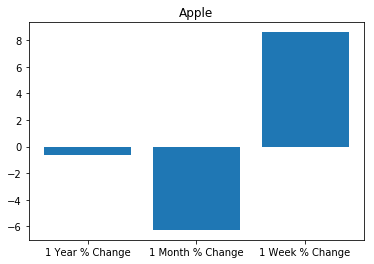

In [26]:
#鄧崴駿：程式(爬蟲部分+GUI)
#陳泊均：程式(繪圖部分）
#方念禧：財金相關知識匯集，提供參考網站
#林家生、陳睿瀚：debug,優化程式碼及提供想法

import tkinter as tk
from PIL import Image,ImageTk
from selenium import webdriver
import re
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
#爬公司名稱輸出結果
#chromedriver.exe執行檔所存在的路徑 爬蟲講義
chrome_path = "/Users/ilike/Downloads/chromedriver"
driver = webdriver.Chrome(chrome_path)
driver.get('https://www.macrotrends.net/stocks/stock-screener')# 輸入網址，交給瀏覽器 
pageSource = driver.page_source  # 取得網頁原始碼

soup=BeautifulSoup(pageSource,'html.parser')
scripts=soup.find_all("script")
for script in scripts:
    if re.search('var originalData = \[.*\]',str(script)):
        data=re.search('var originalData = \[.*\]',str(script)).group(0) 
        
data=re.search('\[.*\]',data).group(0)
data=data[2:len(data)-2]
datas=data.split("},{") 

#用json把資料轉乘dict再轉成DataFrame 跑得有點久
df=pd.DataFrame([json.loads('{'+datas[0]+'}')])
for i in range(1,len(datas)):
    add_df=pd.DataFrame([json.loads('{'+datas[i]+'}')])
    df=df.append(add_df,ignore_index=True)

#GUI的部分
window = tk.Tk()
window.title("Stock Screener")
var=tk.StringVar()

label_1 = tk.Label(window, text="請輸入指定關鍵字(股票名稱)").pack()
e_1 = tk.Entry(window, textvariable=var).pack()
def button_onclick():       
    vtext=var.get()
    #找到跟輸入一樣的股票公司
    for k in range(len(df)):
        if (df['comp_name_2'][k] == vtext):
            #clear buffer
            plt.cla()
            plt.clf()
            plt.close()
            #繪圖部分
            #測試輸出Market Cap的值
            x=['1 Year % Change', '1 Month % Change', '1 Week % Change']
            y=[float(df['price_1y'][k]), float(df['price_1m'][k]), float(df['price_1w'][k])]
            plt.bar(x,y)
            plt.title(vtext)
            plt.savefig(vtext+"_price.png")

            pic = ImageTk.PhotoImage(Image.open(vtext+"_price.png"))
            cv = tk.Canvas(window, height=500, width=500)
            scroll_y = tk.Scrollbar(cv, orient="vertical", command=cv.yview)
            cv.image = pic
            cv.create_image(10, 10, anchor='nw', image=pic)
            cv.pack()
            plt.show()
    return
   
button1 = tk.Button(window, text='送出',command=button_onclick).pack()
window.mainloop()